In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
flatcs = cv2.imread("../DATA/flat_chessboard.png")
flatcs = cv2.cvtColor(flatcs,cv2.COLOR_BGR2RGB)

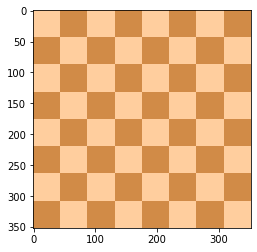

In [3]:
plt.imshow(flatcs)

In [4]:
greyflat = cv2.imread("../DATA/flat_chessboard.png",0)

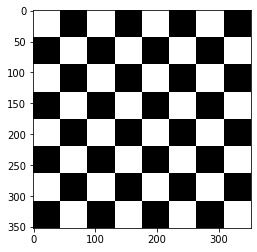

In [5]:
plt.imshow(greyflat,"gray")

In [6]:
greyflat = greyflat.astype('float32')

In [7]:
dst = cv2.cornerHarris(greyflat,2,3,0.04)

In [8]:
dst # this isn't an array of an image, rather its an array of probabilities 
    # the greater the probability, the highter chance of it being a corner

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
dst.max()

1230700.1

In [10]:
dst.shape

(352, 352)

In [11]:
dst.min()

-630118.44

In [12]:
dst.argmax()

15179

In [13]:
len(dst[dst == 0])

109561

In [14]:
len(dst[(dst>0) & (dst< 1)])

0

In [15]:
352 * 352

123904

In [16]:
len(dst[dst == 1])

0

In [17]:
len(dst[dst>1])

441

In [18]:
109561 + 441 

110002

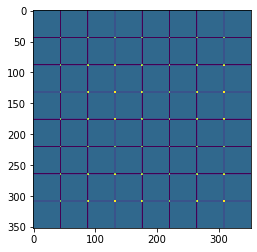

In [19]:
plt.imshow(dst)

In [20]:
dst = cv2.dilate(dst,None)

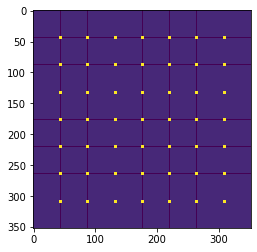

In [21]:
plt.imshow(dst)

In [22]:
flatcs[dst > 0.01 * dst.max()] = [127,0,255]

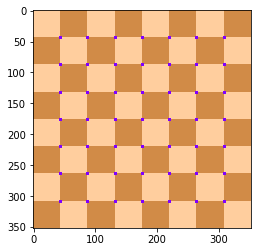

In [23]:
plt.imshow(flatcs)

In [24]:
# flatcs

In [25]:
# newdst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)

In [26]:
flatcs = cv2.imread("../DATA/flat_chessboard.png")
flatcs = cv2.cvtColor(flatcs,cv2.COLOR_BGR2RGB)

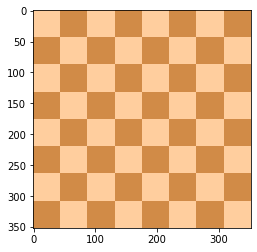

In [27]:
plt.imshow(flatcs)

In [28]:
grey = cv2.cvtColor(flatcs,cv2.COLOR_RGB2GRAY)

In [29]:
grey = grey.astype('float32')

In [30]:
ret = cv2.goodFeaturesToTrack(grey,50,0.01,20)

In [31]:
ret

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]],

       [[ 88., 308.]],

       [[ 44., 308.]],

       [[308., 264.]],

       [[264., 264.]],

       [[220., 264.]],

       [[176., 264.]],

       [[132., 264.]],

       [[ 88., 264.]],

       [[ 44., 264.]],

       [[308., 220.]],

       [[264., 220.]],

       [[220., 220.]],

       [[176., 220.]],

       [[132., 220.]],

       [[ 88., 220.]],

       [[ 44., 220.]],

       [[308., 176.]],

       [[264., 176.]],

       [[220., 176.]],

       [[176., 176.]],

       [[132., 176.]],

       [[ 88., 176.]],

       [[ 44., 176.]],

       [[308., 132.]],

       [[264., 132.]],

       [[220., 132.]],

       [[176., 132.]],

       [[132., 132.]],

       [[ 88., 132.]],

       [[ 44., 132.]],

       [[308.,  88.]],

       [[264.,  88.]],

       [[220.,  88.]],

       [[176.,  88.]],

       [[132.,  88.]],

       [[ 88.,  88.]],

       [[ 44.,  

In [32]:
flatcpy = flatcs.copy()
for i in ret:
    x, y = i.ravel()
    cv2.circle(flatcpy,(x,y),3,(255,0,0),-1)

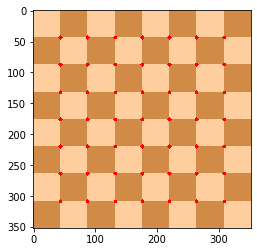

In [33]:
plt.imshow(flatcpy)

In [36]:
normalcs = cv2.imread("../DATA/real_chessboard.jpg")
normalcs = cv2.cvtColor(normalcs,cv2.COLOR_BGR2RGB)

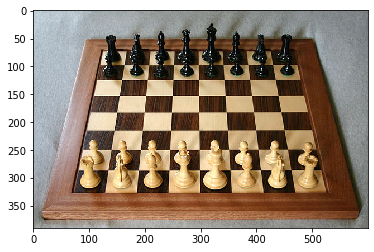

In [37]:
plt.imshow(normalcs)

In [38]:
normalgr = cv2.cvtColor(normalcs,cv2.COLOR_RGB2GRAY)

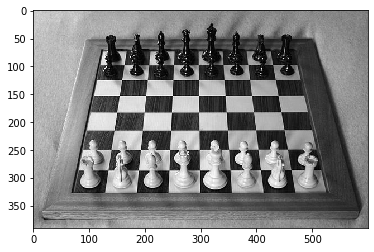

In [40]:
plt.imshow(normalgr,"gray")

In [41]:
normalgr = normalgr.astype('float32')

In [42]:
res = cv2.cornerHarris(normalgr,2,3,0.04)

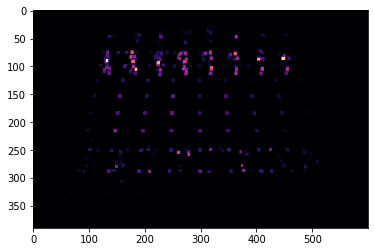

In [48]:
plt.imshow(cv2.dilate(res,None),"magma")

In [45]:
res = cv2.dilate(res,None)

In [46]:
normalcs[res>0.01*res.max()] = [255,0,0]

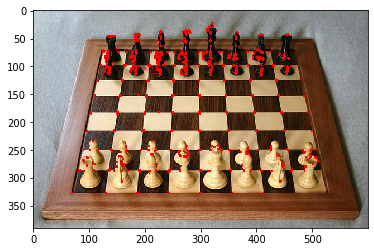

In [47]:
plt.imshow(normalcs)

In [49]:
normalcs = cv2.imread("../DATA/real_chessboard.jpg")
normalcs = cv2.cvtColor(normalcs,cv2.COLOR_BGR2RGB)

In [50]:
normalcs[res>0.01*res.max()] 

array([[114, 118, 104],
       [111, 113, 100],
       [140, 142, 129],
       ...,
       [111,  55,  22],
       [114,  58,  25],
       [116,  60,  27]], dtype=uint8)

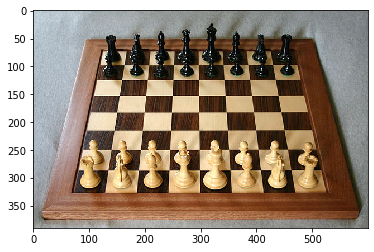

In [51]:
plt.imshow(normalcs)

In [52]:
normalgr = cv2.cvtColor(normalcs,cv2.COLOR_RGB2GRAY)

In [53]:
normalgr = normalgr.astype('float32')

In [54]:
ret = cv2.goodFeaturesToTrack(normalgr,50,0.01,30)

In [55]:
for i in ret:
    x,y = i.ravel()
    cv2.circle(normalcs,(x,y),3,(255,0,0),-1)

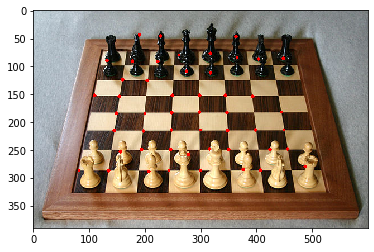

In [56]:
plt.imshow(normalcs)